##Final Team Project
Team 2

Muhammad Haris, Arifa Kokab, Tyler Clinscales

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Adjust the path below to point to the location of your file in Google Drive
file_path = '/content/drive/My Drive/cropdata_updated.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display a concise summary of the dataframe
print("\nDataset Info:")
data.info()

# Describe the numerical features to get mean, count, std, etc.
print("\nStatistics for numerical features:")
print(data.describe())

# Describe the categorical features
print("\nStatistics for categorical features:")
print(data.describe(include=['object', 'bool']))

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

First few rows of the dataset:
  crop ID   soil_type Seedling Stage  MOI  temp  humidity  result
0   Wheat  Black Soil    Germination    1    25      80.0       1
1   Wheat  Black Soil    Germination    2    26      77.0       1
2   Wheat  Black Soil    Germination    3    27      74.0       1
3   Wheat  Black Soil    Germination    4    28      71.0       1
4   Wheat  Black Soil    Germination    5    29      68.0       1

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16411 entries, 0 to 16410
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   crop ID         16411 non-null  object 
 1   soil_type       16411 non-null  object 
 2   Seedling Stage  16411 non-null  object 
 3   MOI             16411 non-null  int64  
 4   temp            16411 non-null  int64  
 5   humidity        16411 non-null  float64
 6   result          16411 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memor

In [3]:
# Print all column names to ensure the correct identification
print("Column names in the DataFrame:")
print(data.columns)

Column names in the DataFrame:
Index(['crop ID', 'soil_type', 'Seedling Stage', 'MOI', 'temp', 'humidity',
       'result'],
      dtype='object')


In [5]:
# Applying one-hot encoding
data_encoded = pd.get_dummies(data, columns=['crop ID', 'soil_type', 'Seedling Stage'], dtype=int)  # Ensure dtype is int

# Check the first few rows to see the encoded variables
print(data_encoded.head())

   MOI  temp  humidity  result  crop ID_Carrot  crop ID_Chilli  \
0    1    25      80.0       1               0               0   
1    2    26      77.0       1               0               0   
2    3    27      74.0       1               0               0   
3    4    28      71.0       1               0               0   
4    5    29      68.0       1               0               0   

   crop ID_Potato  crop ID_Tomato  crop ID_Wheat  soil_type_Alluvial Soil  \
0               0               0              1                        0   
1               0               0              1                        0   
2               0               0              1                        0   
3               0               0              1                        0   
4               0               0              1                        0   

   ...  soil_type_Red Soil  soil_type_Sandy Soil  Seedling Stage_Flowering  \
0  ...                   0                     0              

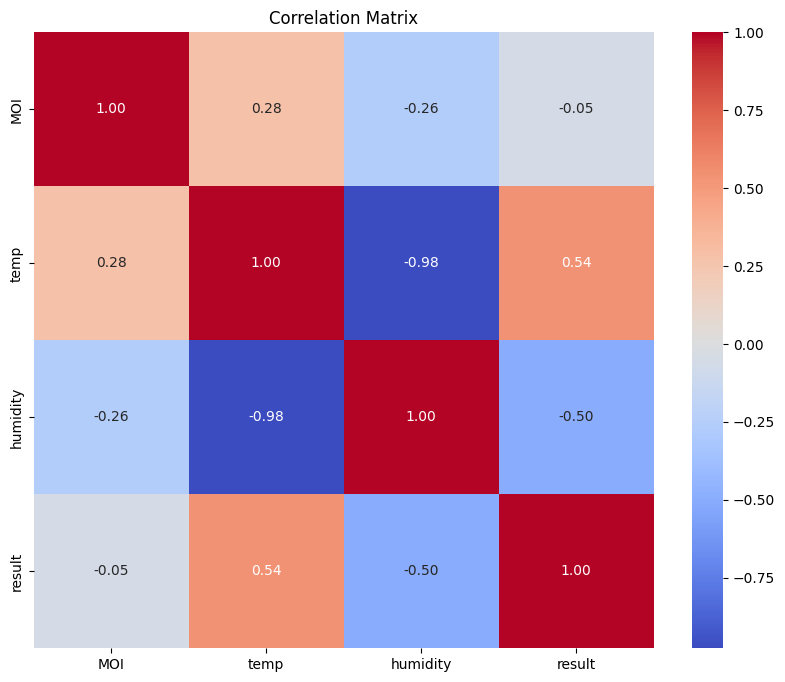

In [7]:
# Compute the correlation matrix for numerical columns only
numeric_data = data.select_dtypes(include=[np.number])  # Selects only the numeric columns from the dataframe
corr_matrix = numeric_data.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

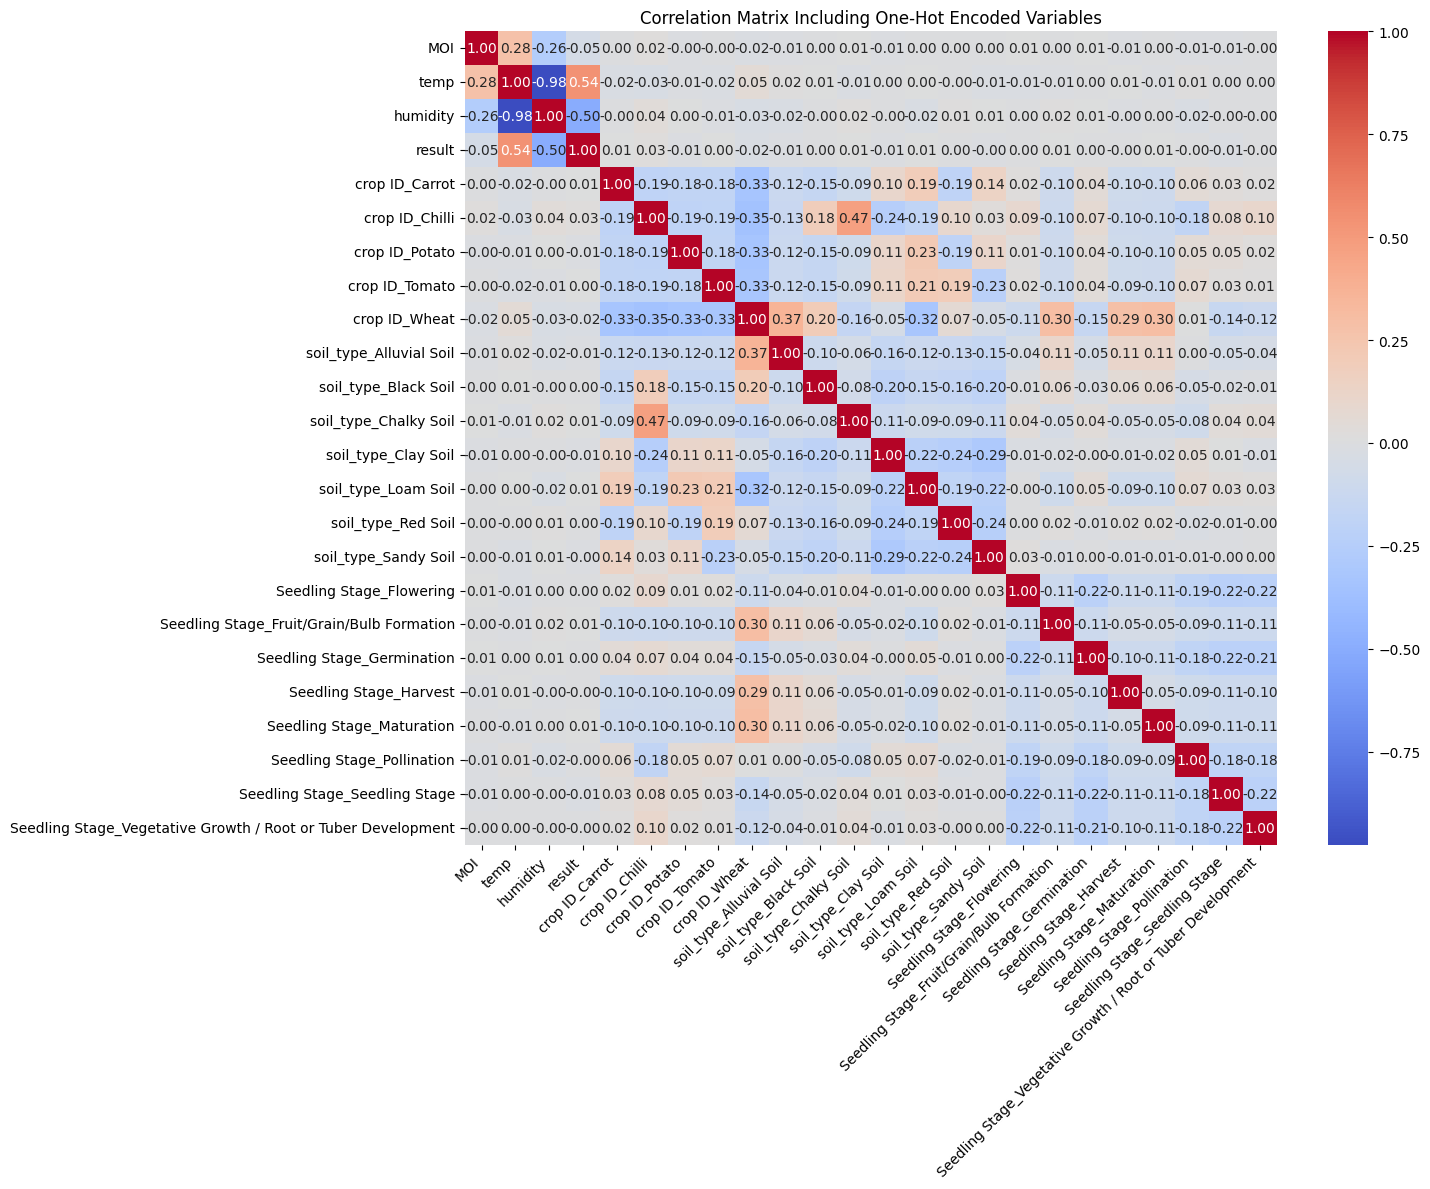

In [8]:
# Compute the correlation matrix for all columns, including one-hot encoded variables
corr_matrix = data_encoded.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(15, 12))  # Adjust the size based on the number of variables to ensure it's readable
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Including One-Hot Encoded Variables')
plt.xticks(rotation=45, ha='right')  # Rotate column labels for better visibility
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to make room for label rotations
plt.show()

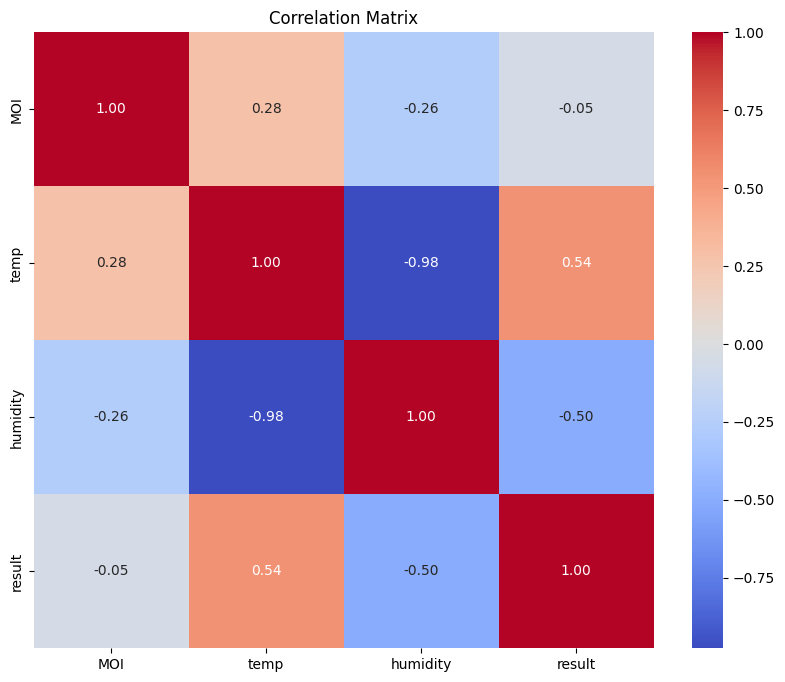

In [9]:
# Compute the correlation matrix for numerical columns only
numeric_data = data.select_dtypes(include=[np.number])  # Selects only the numeric columns from the dataframe
corr_matrix = numeric_data.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Environmental Factors: Temperature and humidity show significant correlations with each other and with the crop yield, confirming their importance in agricultural models.

Impact of MOI: MOI shows negligible direct correlation with crop yield, suggesting that other factors or a combination of factors might be more critical in influencing yield.

Complexity in Categorical Variables: The low correlation values in the extended matrix with one-hot encoded labels suggest that while no single category dominantly influences yield, the interplay between various categories (e.g., type of crop, soil type, growth stages) may require further exploration using more sophisticated, non-linear models like Random Forest or Gradient Boosting Machines to capture their potential combined effects.

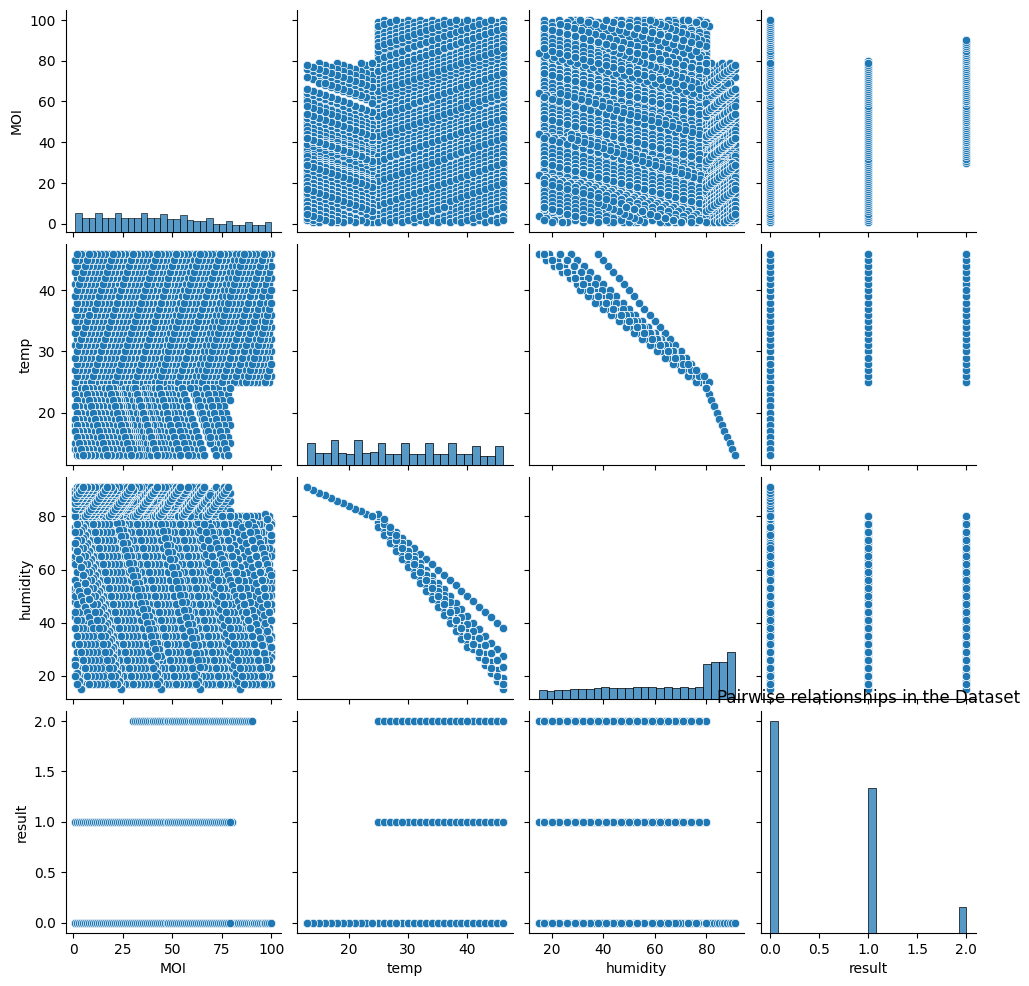

In [10]:
sns.pairplot(data)
plt.title('Pairwise relationships in the Dataset')
plt.show()

In [11]:
# Assuming 'result' is your target variable
X = data_encoded.drop('result', axis=1)  # Features
y = data_encoded['result']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Instantiate the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust these parameters

# Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
# Predict on the testing set
y_pred = rf.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate the Root Mean Squared Error by taking the square root of MSE

r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Root Mean Squared Error: 0.09266866224638332
R^2 Score: 0.9775282087320748


Root Mean Squared Error (RMSE): 0.0927 - This value is very low, indicating that the predictions made by your model are very close to the actual values. A lower RMSE is typically a sign of a more accurate model, suggesting your model does an excellent job in predicting crop yields.

R² Score: 0.9775 - This score is very close to 1, which means your model explains approximately 97.75% of the variance in the crop yield data. This is an excellent score, suggesting that the model fits the data very well and is highly effective at predicting crop yields based on the inputs provided.

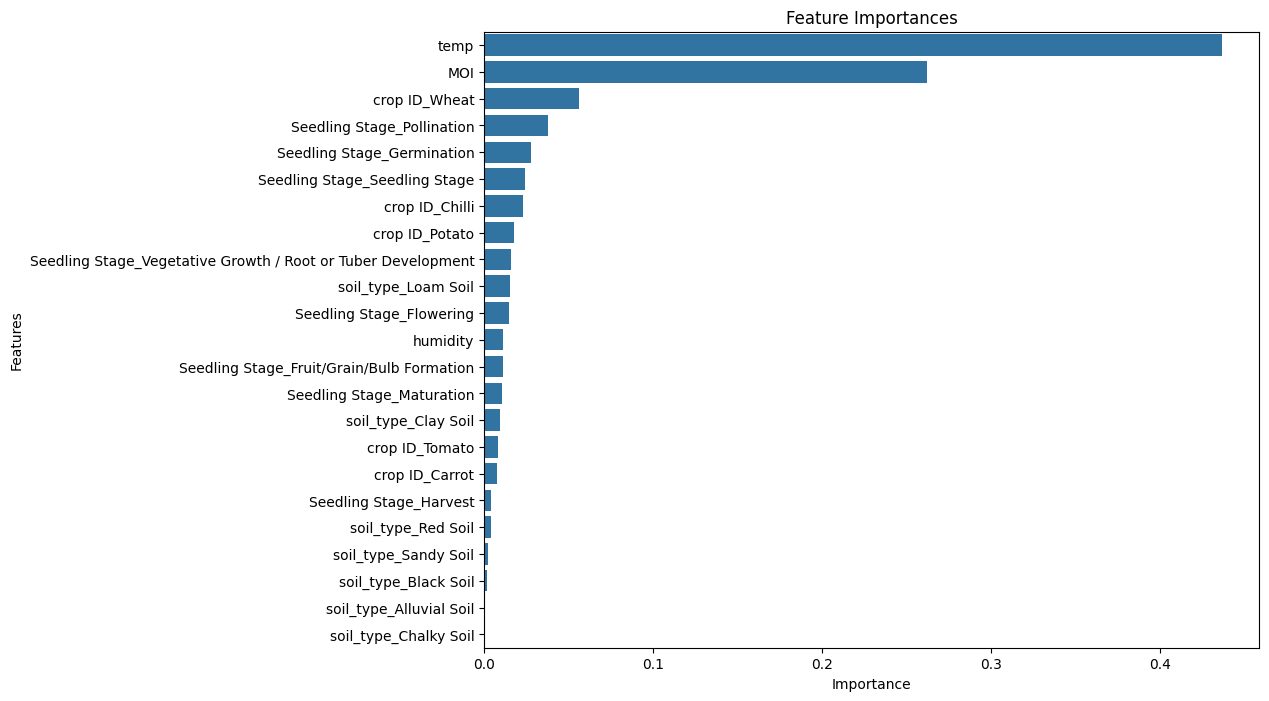

In [15]:
# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Sort the feature importances in descending order and plot
importances_df = pd.DataFrame({'Features': features, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Features', data=importances_df)
plt.title('Feature Importances')
plt.show()

Summary of Feature Importance
Temperature (temp) stands out as the most influential factor affecting crop yields, followed closely by Management of Irrigation (MOI). This indicates that environmental conditions play a crucial role in crop production.
Among the one-hot encoded variables, crop ID_Wheat and variables related to Seedling Stages like Pollination and Germination show notable importance. This suggests specific crops and their growth stages significantly impact yield outcomes.
Soil types and other crop types have relatively lower importance in this model, indicating less direct impact on yield predictions compared to temperature and specific crop stages.

       Actual Yield  Predicted Yield
15116             1             1.40
12496             0             0.00
4048              0             0.00
4671              0             0.00
149               2             1.95


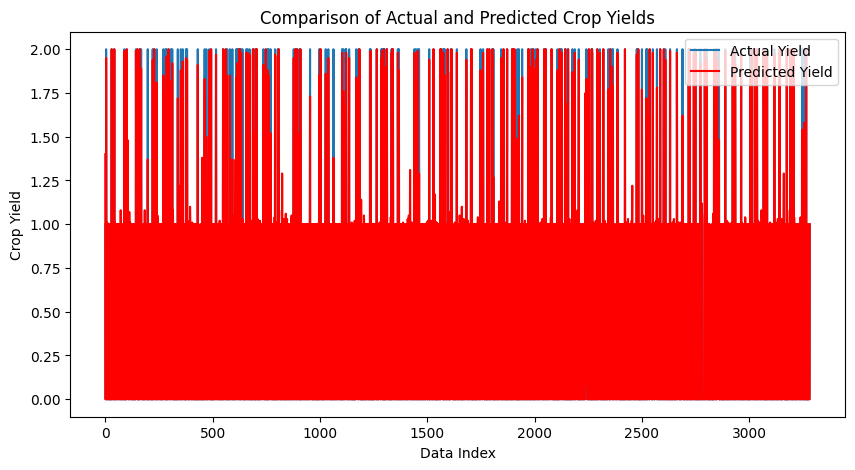

In [16]:
# Assuming 'rf' is your trained RandomForestRegressor and 'X_test' is your test dataset
y_pred = rf.predict(X_test)

# You can create a DataFrame to view the actual vs predicted values side by side
results_df = pd.DataFrame({'Actual Yield': y_test, 'Predicted Yield': y_pred})
print(results_df.head())

# Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(y_test.reset_index(drop=True), label='Actual Yield')
plt.plot(y_pred, label='Predicted Yield', color='r')
plt.title('Comparison of Actual and Predicted Crop Yields')
plt.xlabel('Data Index')
plt.ylabel('Crop Yield')
plt.legend()
plt.show()

The graph and data snippets show that the predictions closely align with the actual yields for most of the dataset, which is a great outcome.

   Actual Yield  Predicted Yield
0             1              1.0
1             1              1.0
2             1              1.0
3             1              1.0
4             1              1.0


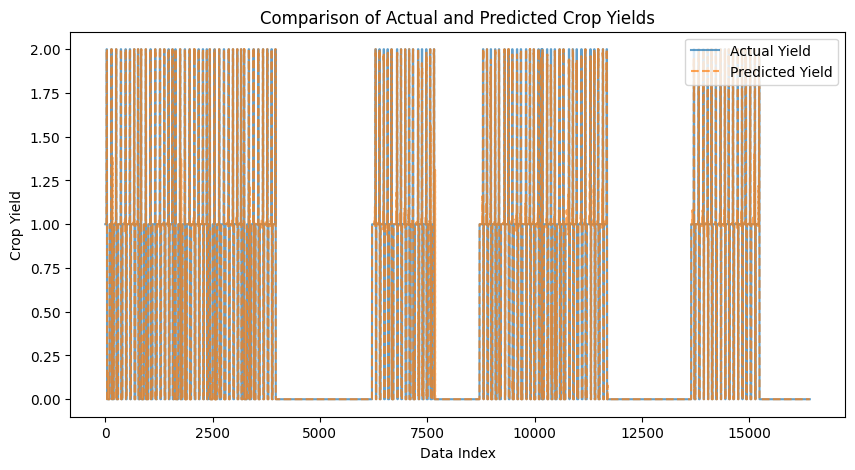

In [17]:
# Assuming 'rf' is trained RandomForest model and 'X' contains the feature data for the entire dataset

# Predict the crop yield for the entire dataset
predicted_yields = rf.predict(X)

# Combine the actual and predicted yields into a DataFrame for easy comparison
results_df = pd.DataFrame({
    'Actual Yield': y,  # Assuming 'y' contains the actual yields
    'Predicted Yield': predicted_yields
})

# Optionally, save or display the results
print(results_df.head())  # Display the first few rows
results_df.to_csv('predicted_crop_yields.csv', index=False)  # Save to CSV for further use

# Plotting the results for visual comparison

plt.figure(figsize=(10, 5))
plt.plot(results_df['Actual Yield'], label='Actual Yield', alpha=0.7)
plt.plot(results_df['Predicted Yield'], label='Predicted Yield', alpha=0.7, linestyle='--')
plt.title('Comparison of Actual and Predicted Crop Yields')
plt.xlabel('Data Index')
plt.ylabel('Crop Yield')
plt.legend()
plt.show()


Results:

Model Performance: The model achieved an R² score of 0.9775, indicating that it explains approximately 97.75% of the variance in crop yield outcomes. The Root Mean Squared Error (RMSE) was impressively low at 0.0927, suggesting high prediction accuracy.
Feature Insights: Temperature was identified as the most significant predictor of crop yield, underscoring the critical impact of climatic conditions on agricultural productivity.
Validation: Predictions were closely aligned with actual yields as visualized in the comparison graphs, confirming the model's precision and reliability.
Applications:

This model can be a valuable tool for farmers, agronomists, and agricultural researchers to optimize farming strategies, enhance resource management, and improve crop yield forecasts.
The insights from the feature importance analysis provide guidance on which factors to monitor closely for yield optimization.
Future Directions:

Model Refinement: Future work could explore further refinement and simplification of the model by reducing less impactful features.
Deployment: Plans for integrating this model into real-time agricultural management systems could extend its practical utility, providing dynamic recommendations to farmers.
Continuous Learning: Regular updates and re-training of the model with new data will be crucial to maintaining its accuracy and relevance.
Conclusion: This project successfully demonstrates the application of machine learning techniques in agriculture, offering not just a predictive tool but a comprehensive analysis platform that enhances understanding and decision-making in crop management. The excellent performance metrics signify a robust model that stakeholders can rely on for accurate predictions and effective yield management strategies.

This summary highlights the project's success and its potential impact on agricultural practices, making it an exemplary model of how data-driven technologies can revolutionize traditional industries.